In [7]:
import numpy as np
import scipy.optimize as sopt
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
H = 100.
pts = np.array([[2.,1.],
                [H-2., 1.],
                [H/2., H/2.-1.]
               ])

In [9]:
def closeBorder(nodes):
    return np.vstack((nodes, nodes[0]))
brd = closeBorder(pts)

In [41]:
def G(L, R,H,lst=[]):
    lst.append([L,R])
    return H*(L-R**2)**2+(1-L)**2

In [20]:
x = np.linspace(pts[:,0].min(), pts[:,0].max(), 100)
y = np.linspace(pts[:,1].min(), pts[:,1].max(), 100)

X, Y = np.meshgrid(x, y)
Z = G(X, Y,H)

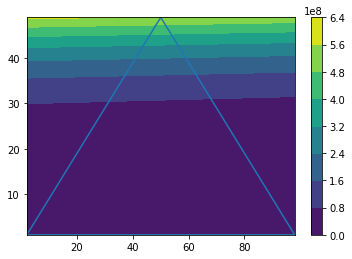

In [21]:
plt.contourf(X, Y, Z)
plt.plot(brd[:,0], brd[:,1])
plt.colorbar()

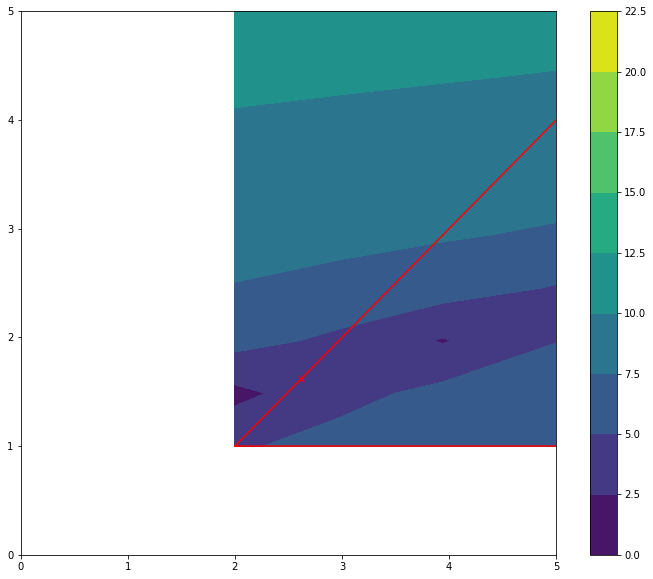

In [40]:
plt.figure(figsize=(12,10))
plt.contourf(X, Y, np.log(Z+1))
plt.plot(brd[:,0], brd[:,1],'r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([2.61479031], [1.61479031],'rx')
plt.colorbar()

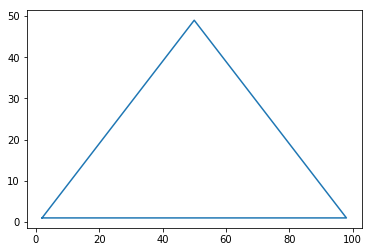

In [12]:
plt.plot(brd[:,0], brd[:,1])

In [15]:
#[1, 1-H, 1]
#[np.inf, np.inf, np.inf]
#[[1.,-1.], [-1.,-1.], [0.,1.]]

In [24]:
lc = sopt.LinearConstraint([[1.,-1.], [-1.,-1.],[0.,1.]],
                           [1, 1-H, 1],
                           [np.inf, np.inf, np.inf])

In [26]:
ineq_constr = {'type':'ineq',
              'fun':lambda x: np.array([-1.+x[0]-x[1],
                                       H-1.-x[0]-x[1],
                                       -1.+x[1]]),
              'jac':lambda x: np.array([[1., -1.],
                                       [-1., -1.],
                                       [0., 1.]])
              }

In [50]:
lst = []
p1 = sopt.minimize(lambda x, H: G(x[0],x[1],H,lst),[50.,30.],args=(H,),
              method='COBYLA',
              options={'tol':1e-9,'disp':True,'maxiter':100000},
              constraints = [ineq_constr])

In [52]:
p1['x']

array([2.61479031, 1.61479031])

In [47]:
arr = np.array(lst)
arr.shape

(27601, 2)

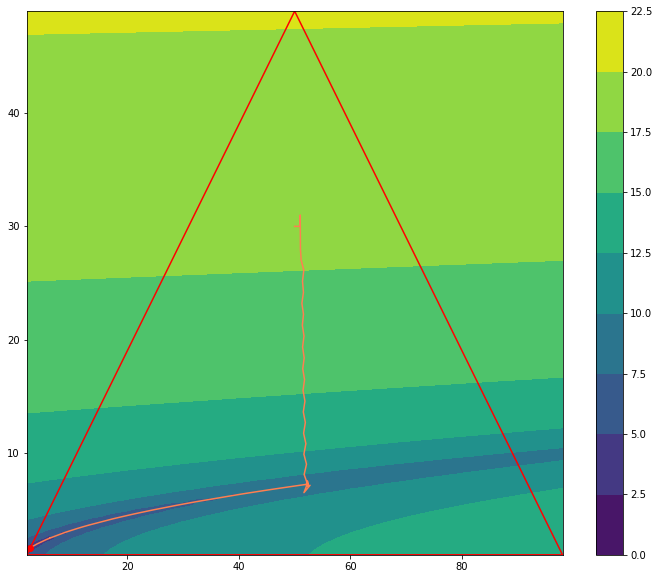

In [57]:
plt.figure(figsize=(12,10))
plt.contourf(X, Y, np.log(Z+1))
plt.plot(brd[:,0], brd[:,1],'r')
plt.plot(arr[:,0],arr[:,1],c='coral')
plt.plot(p1['x'][0],p1['x'][1],'ro')
plt.colorbar()